<a href="https://colab.research.google.com/github/jumafernandez/elementos-computacion-unlu/blob/main/notebooks/demostraciones/SciPy-interpolate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpolación con SciPy.interpolate

El objetivo principal de la interpolación es proporcionar una aproximación suave y continua de una función desconocida a partir de datos limitados. Esto es útil en una variedad de aplicaciones, como gráficos, análisis de datos, procesamiento de señales, diseño de algoritmos y muchas otras áreas de las matemáticas y la ciencia.

Existen varios métodos de interpolación, cada uno con sus propias características y aplicaciones. Algunos de los métodos de interpolación más comunes incluyen:
- **Interpolación lineal:** Este método conecta dos puntos de datos conocidos  
  con una línea recta. La función interpolante es una recta, lo que significa que asume una variación lineal entre los puntos de datos conocidos.
- **Interpolación polinómica:** Aquí, se ajusta un polinomio a los puntos de
  datos conocidos. El grado del polinomio puede variar según la precisión deseada. Los polinomios de Lagrange y los polinomios de Newton son ejemplos comunes de este tipo de interpolación.
- **Interpolación spline:** En este enfoque, se utilizan polinomios de menor
  grado para interpolar secciones de los datos. Los polinomios se ajustan de manera que sean continuos y suaves en los puntos de conexión, evitando oscilaciones indeseadas.
- **Interpolación trigonométrica:** Se utiliza para datos periódicos, como
  señales senoidales. La interpolación trigonométrica utiliza funciones trigonométricas como senos y cosenos para ajustar los datos.
- **Interpolación cúbica:** Este método se centra en la interpolación de curvas
  suaves mediante polinomios cúbicos, garantizando continuidad en la primera y segunda derivada.

La elección del método de interpolación adecuado depende de la naturaleza de los datos y los requisitos de precisión. Es importante tener en cuenta que la interpolación asume que la función subyacente es continua y suave entre los puntos de datos conocidos, lo que puede no ser válido en todas las situaciones. Por lo tanto, es esencial comprender las limitaciones y los supuestos de la interpolación al aplicarla en contextos específicos.

En esta breve notebook se muestra un ejemplo de utilización del subpaquete interpolate de SciPy.

Para la demostración se utilizará un dataset sobre diabetes publicado en Kaggle al que se accede a través de siguiente [enlace](
https://www.kaggle.com/datasets/saurabh00007/diabetescsv).


En primer lugar importo las librerías que voy a utilizar:

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

Luego, descargo del Repositorio Github el dataset y lo cargo en un dataframe:

In [16]:
!wget 'https://raw.githubusercontent.com/jumafernandez/elementos-computacion-unlu/main/data/ingresantes-sistemas.csv'

--2023-09-02 12:55:43--  https://raw.githubusercontent.com/jumafernandez/elementos-computacion-unlu/main/data/ingresantes-sistemas.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71 [text/plain]
Saving to: ‘ingresantes-sistemas.csv.1’

ingresantes-sistema 100%[===================>]      71  --.-KB/s    in 0s      

2023-09-02 12:55:44 (9.40 MB/s) - ‘ingresantes-sistemas.csv.1’ saved [71/71]



In [18]:
dataset = pd.read_csv("ingresantes-sistemas.csv", delimiter=",")

dataset

,anio,ingresantes
0,1996,220
1,1997,141
2,1998,354
3,2000,201
4,2001,339
5,2002,434


Tomo los puntos conocidos y los paso a numpy:

In [19]:
# Convertir las columnas del DataFrame en arrays de NumPy
x_known = dataset['anio'].values
y_known = dataset['ingresantes'].values

Grafico la serie con Pandas:

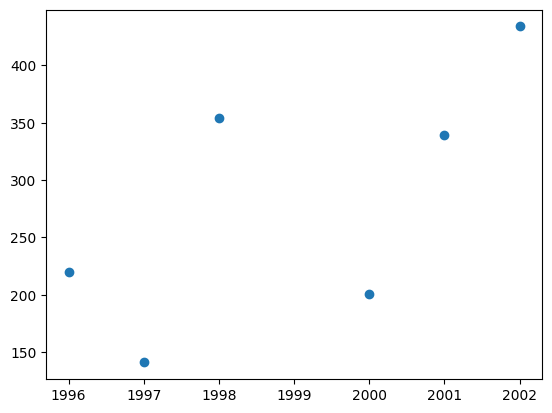

In [20]:
plt.plot(x_known, y_known, 'o')
plt.show()

## Interpolación lineal

Genero la función de interpolación y lo aplico para 1999:

In [24]:
# Crear una función de interpolación lineal
f = interpolate.interp1d(x_known, y_known)

# Punto para el que queremos estimar y
x_interpolate = 1999
y_interpolate = f(x_interpolate)

print(f"Cuando x = {x_interpolate}, y ≈ {y_interpolate}")

Cuando x = 1999, y ≈ 277.5


Me invento otra serie con los datos para dibujar puntos y líneas:

In [52]:
xnew = np.arange(1996, 2003, 1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`

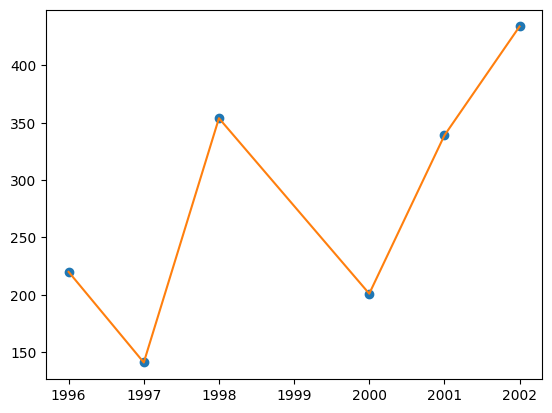

In [53]:
plt.plot(x_known, y_known, 'o', xnew, ynew, '-')
plt.show()

## Interpolación polinómica

Genero la función de interpolación y lo aplico para 1999:

In [36]:
# Crear una función de interpolación lineal
f = interpolate.PchipInterpolator(x_known, y_known)

# Punto para el que queremos estimar y
x_interpolate = 1999
y_interpolate = f(x_interpolate)

print(f"Cuando x = {x_interpolate}, y ≈ {y_interpolate}")

Cuando x = 1999, y ≈ 277.5


Genero muchos puntos y los interpolo con la función ajustada para armar una serie:

In [48]:
# Puntos para la interpolación
x_interpolate = np.linspace(1996, 2002, 140)  # Valores de x para la interpolación
y_interpolate = f(x_interpolate)

Grafico el resultado:

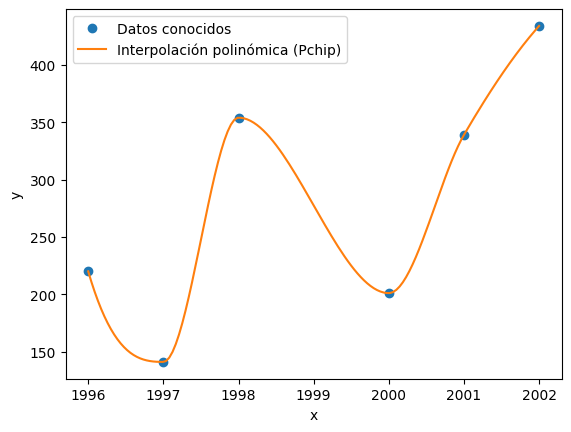

In [49]:
# Mostrar el resultado
plt.plot(x_known, y_known, 'o', label='Datos conocidos')
plt.plot(x_interpolate, y_interpolate, label='Interpolación polinómica (Pchip)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Interpolación cúbica

Genero la función de interpolación y lo aplico para 1999:

In [54]:
# Crear una función de interpolación lineal
f = interpolate.CubicSpline(x_known, y_known)

# Punto para el que queremos estimar y
x_interpolate = 1999
y_interpolate = f(x_interpolate)

print(f"Cuando x = {x_interpolate}, y ≈ {y_interpolate}")

Cuando x = 1999, y ≈ 299.34375


Genero muchos puntos y los interpolo con la función para armar una serie:

In [55]:
# Puntos para la interpolación
x_interpolate = np.linspace(1996, 2002, 140)  # Valores de x para la interpolación
y_interpolate = f(x_interpolate)

Grafico el resultado:

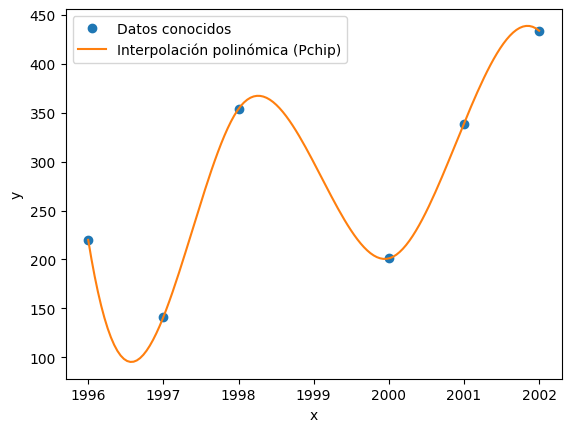

In [56]:
# Mostrar el resultado
plt.plot(x_known, y_known, 'o', label='Datos conocidos')
plt.plot(x_interpolate, y_interpolate, label='Interpolación cúbica')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()